In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utilities import get_hashtags, clean_tweet, translate_emoji
#Reading data and models
import glob                     
import os
import pickle
import re
import numpy as np
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [21]:
# load parquet file
df = pd.read_parquet("Analysis_results/final.parquet")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4688142 entries, 0 to 4469910
Data columns (total 15 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Datetime       datetime64[ns, UTC]
 1   Tweet_Id       int64              
 2   Tweet          string             
 3   Username       string             
 4   Reply_Count    int64              
 5   Retweet_Count  int64              
 6   Like_Count     int64              
 7   Tweet_Clean    object             
 8   Sentiment      object             
 9   Hate_Speech    object             
 10  Offensive      object             
 11  Topic          object             
 12  Hashtags       object             
 13  Topic_Sport    object             
 14  Bank           object             
dtypes: datetime64[ns, UTC](1), int64(4), object(8), string(2)
memory usage: 572.3+ MB


In [23]:
banks_df = df[df["Username"].str.lower().str.contains('fnb|standardbank|nedbank|absa|capitec',regex = True)]

In [24]:
# remove rows where username is in bank_search
df = df[ ~df["Username"].str.lower().str.contains('fnb|standardbank|nedbank|absa|capitec',regex = True)]

<AxesSubplot: title={'center': 'Total number of tweets per bank'}, xlabel='Bank', ylabel='Number of tweets'>

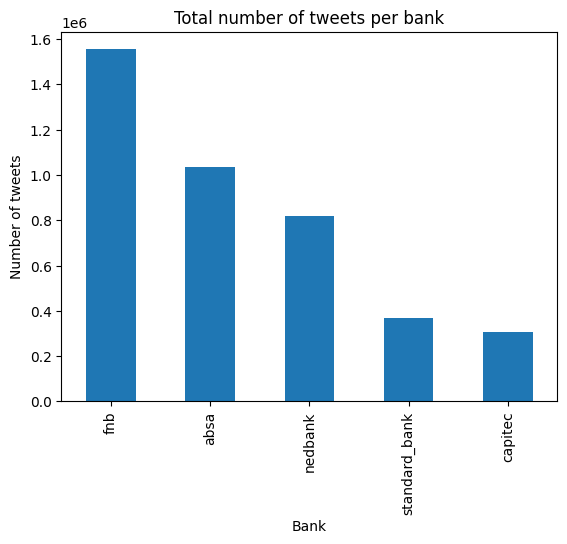

In [25]:
# Plot the total number of tweets per bank
df['Bank'].value_counts().plot(kind='bar', title='Total number of tweets per bank', xlabel='Bank', ylabel='Number of tweets')

<AxesSubplot: title={'center': 'Number of likes per bank'}, xlabel='Bank', ylabel='Number of likes'>

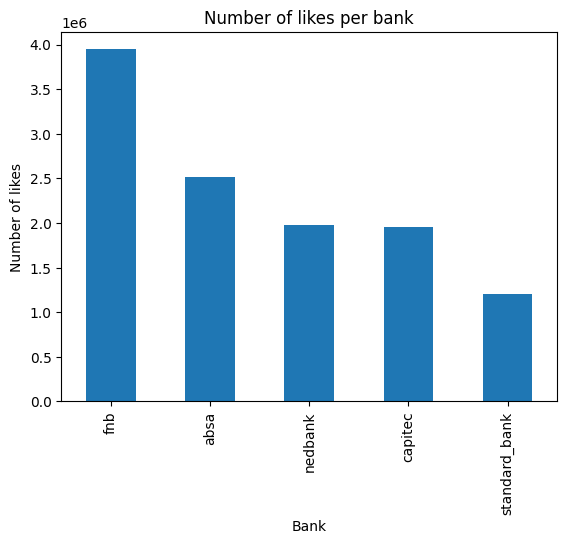

In [26]:
# plot the total number of likes per bank
df.groupby('Bank')['Like_Count'].sum().sort_values(ascending=False).plot(kind='bar', title='Number of likes per bank', xlabel='Bank', ylabel='Number of likes')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4083923 entries, 0 to 4469910
Data columns (total 15 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Datetime       datetime64[ns, UTC]
 1   Tweet_Id       int64              
 2   Tweet          string             
 3   Username       string             
 4   Reply_Count    int64              
 5   Retweet_Count  int64              
 6   Like_Count     int64              
 7   Tweet_Clean    object             
 8   Sentiment      object             
 9   Hate_Speech    object             
 10  Offensive      object             
 11  Topic          object             
 12  Hashtags       object             
 13  Topic_Sport    object             
 14  Bank           object             
dtypes: datetime64[ns, UTC](1), int64(4), object(8), string(2)
memory usage: 498.5+ MB


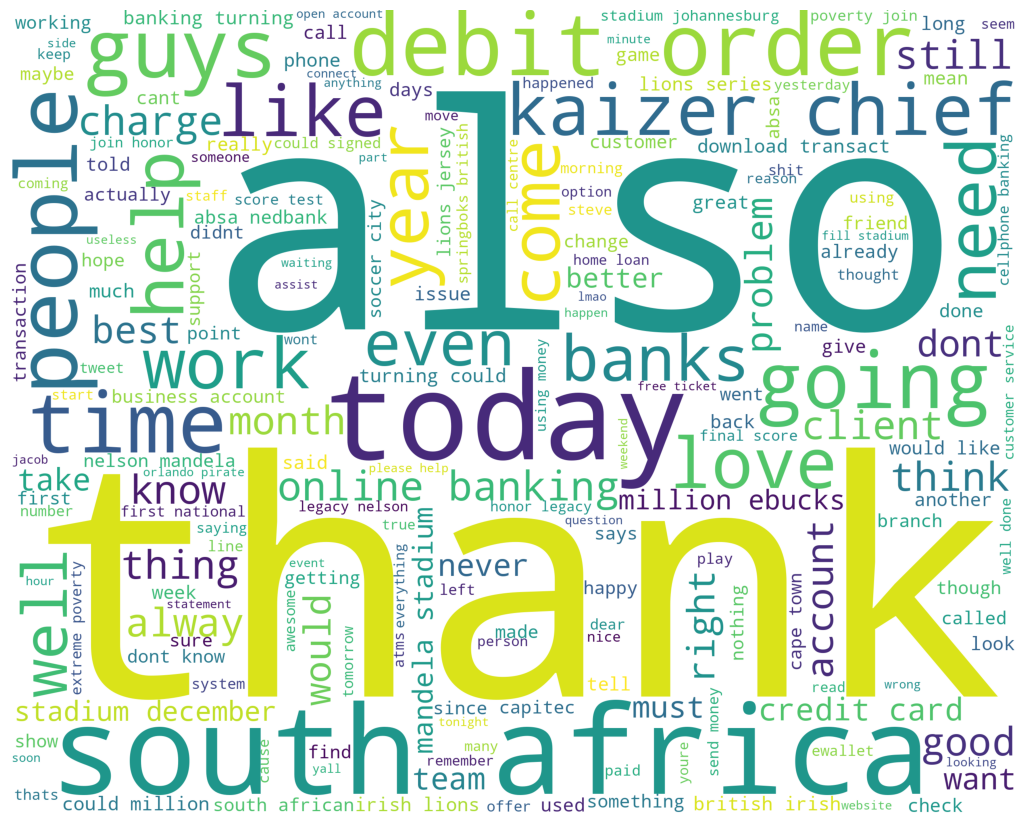

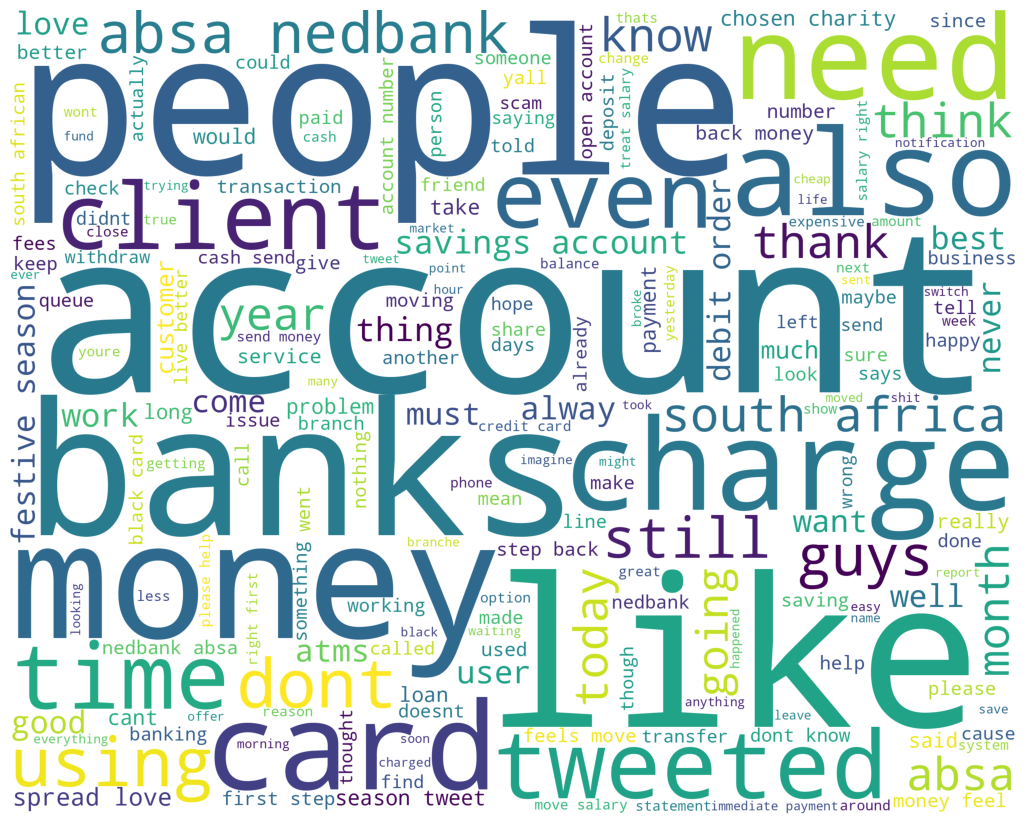

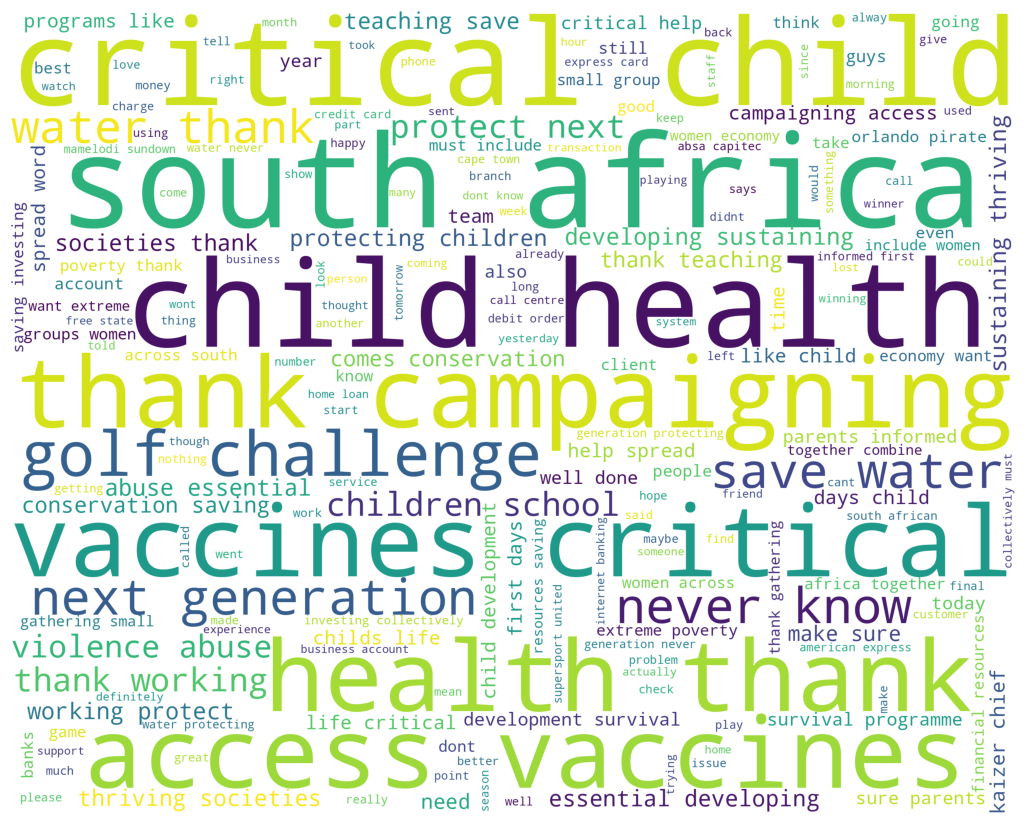

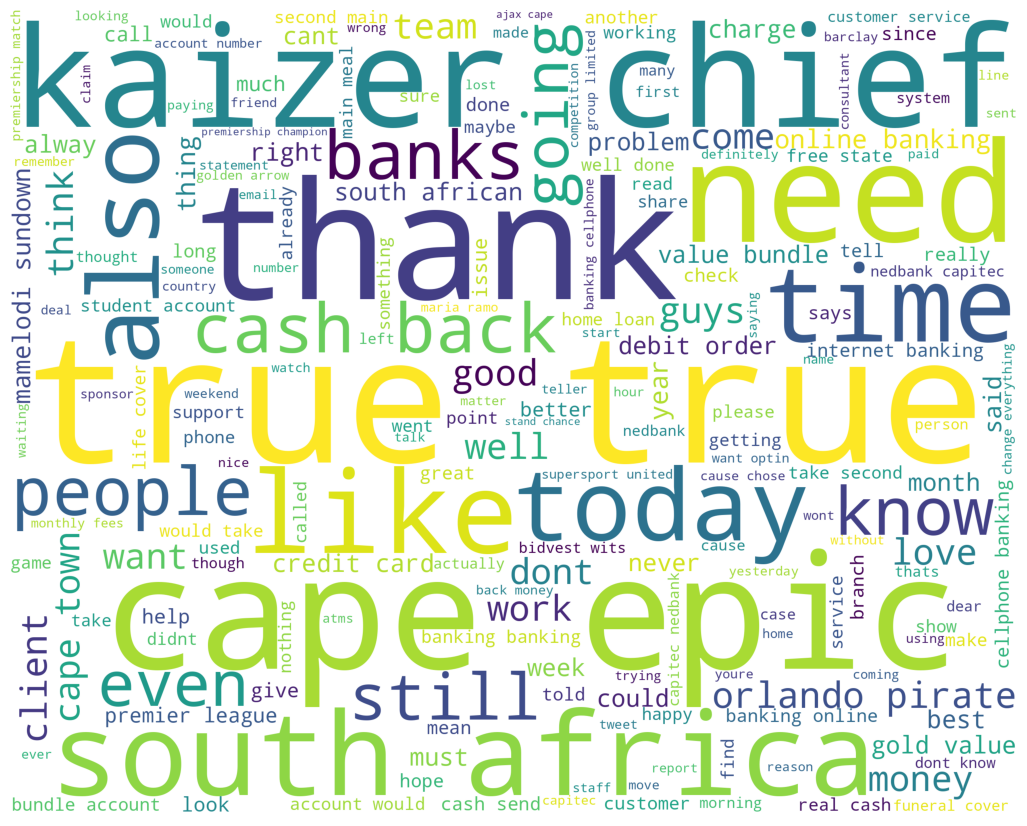

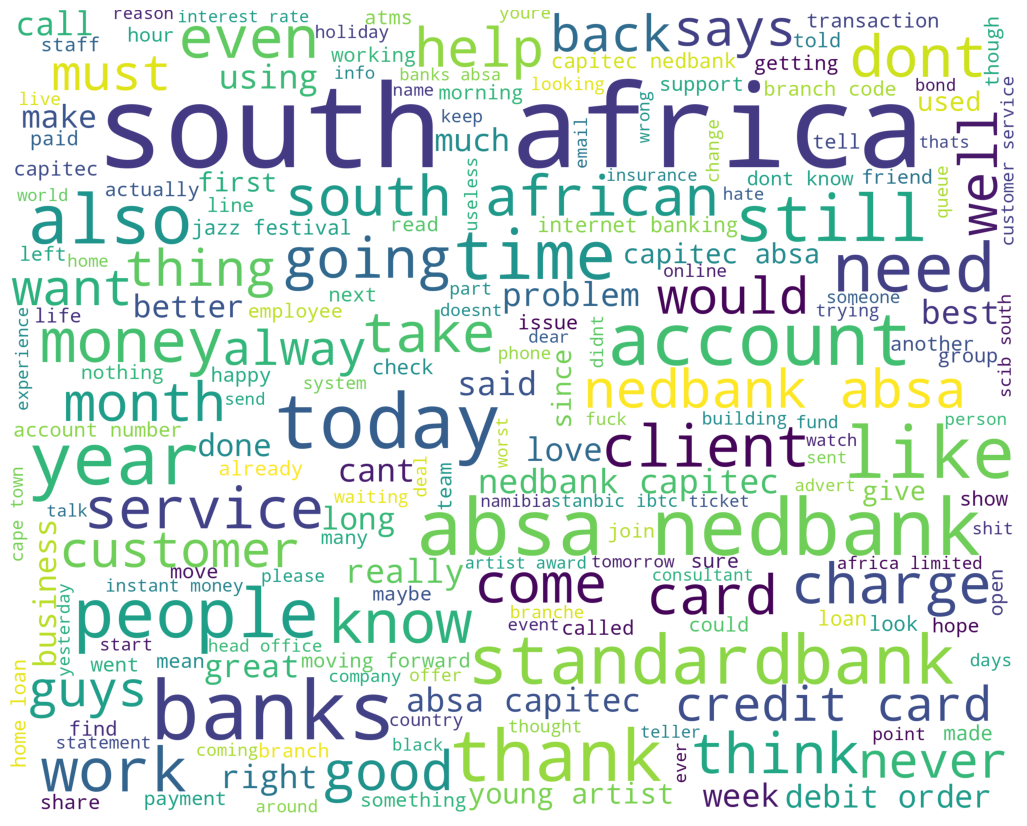

In [8]:
# create function for word cloud
def word_cloud(df, bank):
    words = ' '.join(df['Tweet_Clean'])
    words = re.sub(rf'{bank}', '', words)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'co'
                                and word != 'RT'
                                and word != 'standard bank'
                                and word != 'standard'
                                and word != 'bank'
                                and word != 'face'
                                # and not any word less than 3 characters
                                and len(word) > 3
                            ])
    wordcloud = WordCloud(
                          stopwords=stop_words,
                          background_color='white',
                          width=2500,
                          height=2000
                         ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.title(f'Word cloud of tweets for {bank}')
    plt.axis('off')
    plt.show()

# plot word cloud for each bank
for bank in df['Bank'].unique():
    word_cloud(df[df['Bank'] == bank], bank)
    